In [22]:
#!/usr/bin/python
import pandas as pd
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.cross_validation import train_test_split 
import pprint
from sklearn.feature_selection import SelectKBest
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit

# dataset taken from UCI ML repo - https://archive.ics.uci.edu/ml/datasets/Flags
data = pd.read_csv('flags.csv', header = None)
data.columns = ['name','landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours',
               'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses',
               'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft',
               'botright']
# Explore structure of data
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


***My objective is to create a model that can predict the main religion in a country based on the features of the country and the features of the flag of that country. ***


**Attribute Information:**
1. name:	Name of the country concerned 
2. landmass:	1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania 
3. zone:	Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW 
4. area:	in thousands of square km 
5. population:	in round millions 
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic,  9=Japanese/Turkish/Finnish/Magyar, 10=Others 
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others 
8. bars: Number of vertical bars in the flag 
9. stripes: Number of horizontal stripes in the flag 
10. colours: Number of different colours in the flag 
11. red: 0 if red absent, 1 if red present in the flag 
12. green: same for green 
13. blue: same for blue 
14. gold: same for gold (also yellow) 
15. white: same for white 
16. black: same for black 
17. orange: same for orange (also brown) 
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue) 
19. circles: Number of circles in the flag 
20. crosses: Number of (upright) crosses 
21. saltires: Number of diagonal crosses 
22. quarters: Number of quartered sections 
23. sunstars: Number of sun or star symbols 
24. crescent: 1 if a crescent moon symbol present, else 0 
25. triangle: 1 if any triangles present, 0 otherwise 
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0 
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise 
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise 
29. topleft: colour in the top-left corner (moving right to decide tie-breaks) 
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

**Dependant Variable:** 

'religion' which can take the following values:

0=Catholic,
1=Other Christian,
2=Muslim,
3=Buddhist,
4=Hindu,
5=Ethnic,
6=Marxist, 
7=Others 


### Preprocessing data ###

In [23]:
# Preprocessing data
print 'Before preprocessing.....\n'
print data['botright'].value_counts()
print data['topleft'].value_counts()
print data['mainhue'].value_counts()
# Assigning numeric values for 'topleft' and 'botright' values
# data['topleft'] = data['topleft'].map({'red': 0, 
#                                        'blue': 1,
#                                        'green': 2,
#                                        'white': 3,
#                                        'black': 4,
#                                        'gold': 5,
#                                        'brown': 6,
#                                        'orange': 7
#                                       })
# data['botright'] = data['botright'].map({'red': 0, 
#                                        'blue': 1,
#                                        'green': 2,
#                                        'white': 3,
#                                        'black': 4,
#                                        'gold': 5,
#                                        'brown': 6,
#                                        'orange': 7
#                                       })
# data['mainhue'] = data['mainhue'].map({'red': 0, 
#                                        'blue': 1,
#                                        'green': 2,
#                                        'white': 3,
#                                        'black': 4,
#                                        'gold': 5,
#                                        'brown': 6,
#                                        'orange': 7
#                                       })

# Create a set of dummy variables from the sex variable
df_topleft = pd.get_dummies(data['topleft']).rename(columns=lambda x: 'topleft_' + str(x))
df_botright = pd.get_dummies(data['botright']).rename(columns=lambda x: 'botright_' + str(x))
df_mainhue = pd.get_dummies(data['mainhue']).rename(columns=lambda x: 'mainhue_' + str(x))
data = pd.concat([data, df_topleft,df_botright,df_mainhue ], axis=1)

Before preprocessing.....

red       69
blue      47
green     40
white     17
black      9
gold       9
brown      2
orange     1
Name: botright, dtype: int64
red       56
blue      43
white     41
green     32
black     12
gold       6
orange     4
Name: topleft, dtype: int64
red       71
blue      40
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: mainhue, dtype: int64


In [4]:
print '\nNew column structure of dataframe with dummy variables: \n\n',data.columns


New column structure of dataframe with dummy variables: 

Index([u'name', u'landmass', u'zone', u'area', u'population', u'language',
       u'religion', u'bars', u'stripes', u'colours', u'red', u'green', u'blue',
       u'gold', u'white', u'black', u'orange', u'mainhue', u'circles',
       u'crosses', u'saltires', u'quarters', u'sunstars', u'crescent',
       u'triangle', u'icon', u'animate', u'text', u'topleft', u'botright',
       u'topleft_black', u'topleft_blue', u'topleft_gold', u'topleft_green',
       u'topleft_orange', u'topleft_red', u'topleft_white', u'botright_black',
       u'botright_blue', u'botright_brown', u'botright_gold',
       u'botright_green', u'botright_orange', u'botright_red',
       u'botright_white', u'mainhue_black', u'mainhue_blue', u'mainhue_brown',
       u'mainhue_gold', u'mainhue_green', u'mainhue_orange', u'mainhue_red',
       u'mainhue_white'],
      dtype='object')


### Setting the feature and target columns ###

In [24]:
# Set the feature and target columns
cols = data.columns.tolist()

# Set the feature and target columns
feature_cols = ['landmass', 
                'zone', 
                'area', 
                'population', 
                'language',
                'bars',
                'stripes',
                'colours',
                'red',
                'green',
                'blue',
                'gold',
                'white',
                'black',
                'orange',
                'circles',
                'crosses',
                'saltires',
                'quarters',
                'sunstars',
                'crescent',
                'triangle',
                'icon',
                'animate',
                'text',
                'topleft_black',
                'topleft_blue', 
                'topleft_gold',
                'topleft_green',
                'topleft_orange',
                'topleft_red',
                'topleft_white',
                'botright_black',
                'botright_blue', 
                'botright_gold',
                'botright_green',
                'botright_orange',
                'botright_red',
                'botright_white',
                'mainhue_black',
                'mainhue_blue', 
                'mainhue_gold',
                'mainhue_green',
                'mainhue_orange',
                'mainhue_red',
                'mainhue_white',
               ]
target_col = ['religion']
# Drop the target column 
features = data[feature_cols]
target = data[target_col]
print '**Sample Feature Column values**'
print features.head()
print '**Sample Target Column values**'
print target.head()

**Sample Feature Column values**
   landmass  zone  area  population  language  bars  stripes  colours  red  \
0         5     1   648          16        10     0        3        5    1   
1         3     1    29           3         6     0        0        3    1   
2         4     1  2388          20         8     2        0        3    1   
3         6     3     0           0         1     0        0        5    1   
4         3     1     0           0         6     3        0        3    1   

   green      ...        botright_orange  botright_red  botright_white  \
0      1      ...                    0.0           0.0             0.0   
1      0      ...                    0.0           1.0             0.0   
2      1      ...                    0.0           0.0             1.0   
3      0      ...                    0.0           1.0             0.0   
4      0      ...                    0.0           1.0             0.0   

   mainhue_black  mainhue_blue  mainhue_gold  mainhue

## Exploratory data analysis ##

In [6]:
print data.describe(include = 'all')

           name    landmass        zone          area   population  \
count       194  194.000000  194.000000    194.000000   194.000000   
unique      194         NaN         NaN           NaN          NaN   
top     Lesotho         NaN         NaN           NaN          NaN   
freq          1         NaN         NaN           NaN          NaN   
mean        NaN    3.572165    2.211340    700.046392    23.268041   
std         NaN    1.553018    1.308274   2170.927932    91.934085   
min         NaN    1.000000    1.000000      0.000000     0.000000   
25%         NaN    3.000000    1.000000      9.000000     0.000000   
50%         NaN    4.000000    2.000000    111.000000     4.000000   
75%         NaN    5.000000    4.000000    471.250000    14.000000   
max         NaN    6.000000    4.000000  22402.000000  1008.000000   

          language    religion        bars     stripes     colours  \
count   194.000000  194.000000  194.000000  194.000000  194.000000   
unique         NaN 

In [7]:
# Checking the value counts for each religion
print 'Checking the value counts for each religion :\n', data['religion'].value_counts()

Checking the value counts for each religion :
1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64


### Free Form Visualization ###

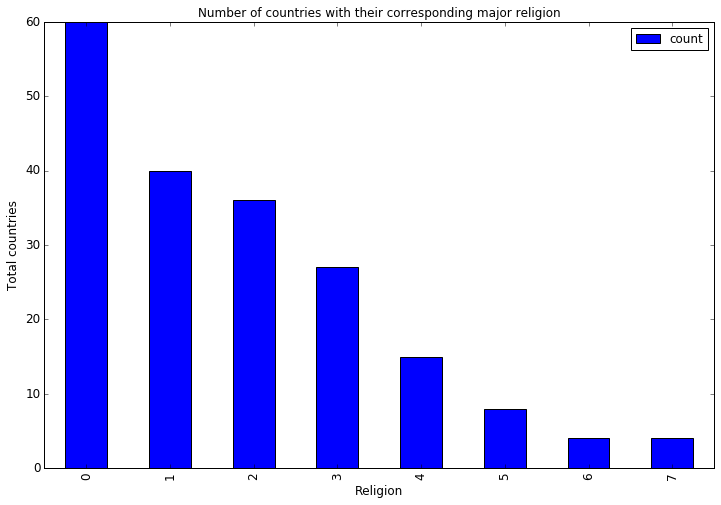

In [9]:
# Get value count for each religion
series = data['religion'].value_counts()

# Convert series to dataframe
df = pd.DataFrame({'religion':series.index, 'count':series.values})

# Plot bar plot
ax = df[['count']].plot(kind='bar', title ="Number of countries with their corresponding major religion",
                                   figsize=(12,8),legend=True, fontsize=12)
ax.set_xlabel("Religion",fontsize=12)
ax.set_ylabel("Total countries",fontsize=12)
plt.show()

   bars  count
0     0    159
1     3     21
2     2      7
3     1      6
4     5      1


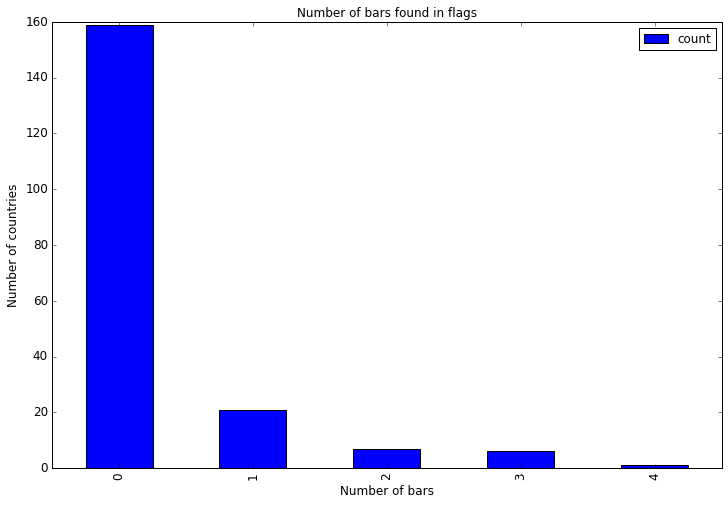

In [10]:
# Get value count for each religion
series = data['bars'].value_counts()

# Convert series to dataframe
df = pd.DataFrame({'bars':series.index, 'count':series.values})
print df
# Plot bar plot
ax = df[['count']].plot(kind='bar', title ="Number of bars found in flags",
                                   figsize=(12,8),legend=True, fontsize=12)
ax.set_xlabel("Number of bars",fontsize=12)
ax.set_ylabel("Number of countries",fontsize=12)
plt.show()

    count  stripes
0     110        0
1      44        3
2      16        2
3      12        5
4       4        1
5       2        9
6       1       14
7       1       13
8       1       11
9       1        7
10      1        6
11      1        4


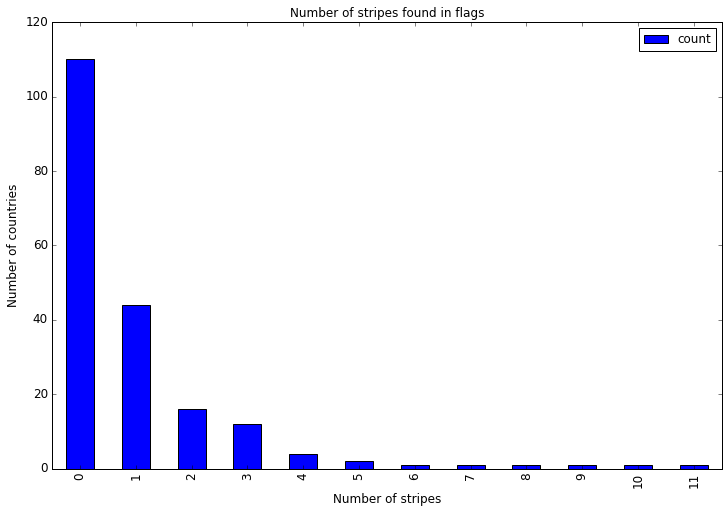

In [11]:
# Get value count for each religion
series = data['stripes'].value_counts()

# Convert series to dataframe
df = pd.DataFrame({'stripes':series.index, 'count':series.values})
print df
# Plot bar plot
ax = df[['count']].plot(kind='bar', title ="Number of stripes found in flags",
                                   figsize=(12,8),legend=True, fontsize=12)
ax.set_xlabel("Number of stripes",fontsize=12)
ax.set_ylabel("Number of countries",fontsize=12)
plt.show()

## Feature Selection ##

In [12]:
# Convert dataframe to dictionary
dict_data = data.to_dict(orient='index')
# Check dictionary structure
dict_data[0]

{'animate': 0,
 'area': 648,
 'bars': 0,
 'black': 1,
 'blue': 0,
 'botright': 'green',
 'botright_black': 0.0,
 'botright_blue': 0.0,
 'botright_brown': 0.0,
 'botright_gold': 0.0,
 'botright_green': 1.0,
 'botright_orange': 0.0,
 'botright_red': 0.0,
 'botright_white': 0.0,
 'circles': 0,
 'colours': 5,
 'crescent': 0,
 'crosses': 0,
 'gold': 1,
 'green': 1,
 'icon': 1,
 'landmass': 5,
 'language': 10,
 'mainhue': 'green',
 'mainhue_black': 0.0,
 'mainhue_blue': 0.0,
 'mainhue_brown': 0.0,
 'mainhue_gold': 0.0,
 'mainhue_green': 1.0,
 'mainhue_orange': 0.0,
 'mainhue_red': 0.0,
 'mainhue_white': 0.0,
 'name': 'Afghanistan',
 'orange': 0,
 'population': 16,
 'quarters': 0,
 'red': 1,
 'religion': 2,
 'saltires': 0,
 'stripes': 3,
 'sunstars': 1,
 'text': 0,
 'topleft': 'black',
 'topleft_black': 1.0,
 'topleft_blue': 0.0,
 'topleft_gold': 0.0,
 'topleft_green': 0.0,
 'topleft_orange': 0.0,
 'topleft_red': 0.0,
 'topleft_white': 0.0,
 'triangle': 0,
 'white': 1,
 'zone': 1}

** Selecting the best features: **

In [25]:
import warnings
warnings.filterwarnings('ignore')
# Selecting the best features
# Use feature selection to select k best features
kbest = SelectKBest()
# Here, features = data[feature_cols] and target = data[target_col]
kbest.fit(features, target)
scores = kbest.scores_
# Combine features with their scores
features_scores = zip(feature_cols[:], scores)

# Top features
features_scores = dict(features_scores)
# Sort features
sorted_features_scores = sorted(features_scores.items(), key=lambda x: x[1], reverse=True)
print 'Sorted feature scores:\n '
pprint.pprint(sorted_features_scores)
# Extract top 15 features out of 28
best_features = dict(sorted_features_scores[:15]).keys()
print '\nBest features:\n '
print best_features

Sorted feature scores:
 
[('language', 13.388135105449459),
 ('landmass', 10.39438223356032),
 ('zone', 8.9322966956954453),
 ('crosses', 8.8412934900390834),
 ('blue', 6.4287074621657823),
 ('green', 6.0348972262058336),
 ('saltires', 5.4011022594922888),
 ('crescent', 4.8289550621319579),
 ('botright_green', 4.6300591502082042),
 ('topleft_white', 4.416168473817117),
 ('botright_red', 3.9503165975516445),
 ('population', 3.8741220801625889),
 ('botright_black', 3.8726368122975874),
 ('mainhue_blue', 3.8610157349865131),
 ('mainhue_white', 3.7882942213834432),
 ('topleft_green', 3.4911005424270716),
 ('botright_blue', 3.2680717671973607),
 ('mainhue_green', 3.1260971561259137),
 ('circles', 2.6831434124637852),
 ('animate', 2.5821008525379097),
 ('mainhue_orange', 2.500667823694545),
 ('topleft_orange', 2.500667823694545),
 ('colours', 2.4570123986525831),
 ('quarters', 2.2151781868810505),
 ('gold', 2.2147478132285521),
 ('white', 2.184391258254887),
 ('orange', 1.9263213750312018),


### Outlier Detection ###

In [14]:
data.columns

Index([u'name', u'landmass', u'zone', u'area', u'population', u'language',
       u'religion', u'bars', u'stripes', u'colours', u'red', u'green', u'blue',
       u'gold', u'white', u'black', u'orange', u'mainhue', u'circles',
       u'crosses', u'saltires', u'quarters', u'sunstars', u'crescent',
       u'triangle', u'icon', u'animate', u'text', u'topleft', u'botright',
       u'topleft_black', u'topleft_blue', u'topleft_gold', u'topleft_green',
       u'topleft_orange', u'topleft_red', u'topleft_white', u'botright_black',
       u'botright_blue', u'botright_brown', u'botright_gold',
       u'botright_green', u'botright_orange', u'botright_red',
       u'botright_white', u'mainhue_black', u'mainhue_blue', u'mainhue_brown',
       u'mainhue_gold', u'mainhue_green', u'mainhue_orange', u'mainhue_red',
       u'mainhue_white'],
      dtype='object')

In [15]:
# For each feature find the data points with extreme high or low values
index_to_outliers = {}
for feature in feature_cols:
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = data[feature].quantile(0.25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = data[feature].quantile(0.75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers = data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))] 
    print outliers
    
    for i in outliers.index.tolist():
        if i in index_to_outliers:
            index_to_outliers[i] += 1
        else:
            index_to_outliers[i] = 1
    
filtered_dict = {k:v for k,v in index_to_outliers.iteritems() if v > 1}
    
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [filtered_dict.keys()]

# Remove the outliers, if any were specified
# data = data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'landmass':
Empty DataFrame
Columns: [name, landmass, zone, area, population, language, religion, bars, stripes, colours, red, green, blue, gold, white, black, orange, mainhue, circles, crosses, saltires, quarters, sunstars, crescent, triangle, icon, animate, text, topleft, botright, topleft_black, topleft_blue, topleft_gold, topleft_green, topleft_orange, topleft_red, topleft_white, botright_black, botright_blue, botright_brown, botright_gold, botright_green, botright_orange, botright_red, botright_white, mainhue_black, mainhue_blue, mainhue_brown, mainhue_gold, mainhue_green, mainhue_orange, mainhue_red, mainhue_white]
Index: []

[0 rows x 53 columns]
Data points considered outliers for the feature 'zone':
Empty DataFrame
Columns: [name, landmass, zone, area, population, language, religion, bars, stripes, colours, red, green, blue, gold, white, black, orange, mainhue, circles, crosses, saltires, quarters, sunstars, crescent, triangle, i

In [16]:
for key, value in filtered_dict.iteritems():
    print "The datapoint {} has outliers for {} features".format(key, value)

The datapoint 0 has outliers for 3 features
The datapoint 1 has outliers for 2 features
The datapoint 2 has outliers for 6 features
The datapoint 3 has outliers for 5 features
The datapoint 4 has outliers for 4 features
The datapoint 5 has outliers for 3 features
The datapoint 6 has outliers for 6 features
The datapoint 7 has outliers for 2 features
The datapoint 8 has outliers for 5 features
The datapoint 9 has outliers for 5 features
The datapoint 10 has outliers for 8 features
The datapoint 12 has outliers for 6 features
The datapoint 14 has outliers for 6 features
The datapoint 15 has outliers for 6 features
The datapoint 16 has outliers for 4 features
The datapoint 17 has outliers for 6 features
The datapoint 18 has outliers for 4 features
The datapoint 19 has outliers for 7 features
The datapoint 20 has outliers for 5 features
The datapoint 21 has outliers for 2 features
The datapoint 22 has outliers for 4 features
The datapoint 23 has outliers for 9 features
The datapoint 24 has

### Helper functions ###

In [17]:
#!/usr/bin/python

""" 
    A tool for converting data from the
    dictionary format to an (n x k) python list that's 
    ready for training an sklearn algorithm.

    n -> no. of key-value pairs in dictonary
    k -> no. of features being extracted

    Dictionary keys are indexes of countries in dataset.
    
    Dictionary values are dictionaries, where each key-value pair in the dict is the name
        of a feature, and its value for that feature.
"""
import numpy as np

def featureFormat(dictionary, 
                  features,
                  sort_keys = False):
    """ convert dictionary to numpy array of features"""
    
    return_list = []

    if isinstance(sort_keys,str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
#         print key
        for feature in features:
#             print feature
#             print dictionary[key][feature]
            value = dictionary[key][feature]
            tmp_list.append( float(value) )
        
        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'religion' class as criteria.
        if features[0] == 'religion':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )
    
    # return numpy array of features
    return np.array(return_list)


def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this is the 
        quantity i want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )
#     print 'Target: \n', target
#     print '\nFeatures: \n', features[1]
    return target, features

In [26]:
import warnings
warnings.filterwarnings('ignore')
# Apply minmax scaler to area and population columns
data[['area','population']] = data[['area','population']].apply(lambda x: MinMaxScaler().fit_transform(x))

# Convert dataframe to dictionary
dict_data = data.to_dict(orient='index')

# Use best features
new_feature_list = ['religion'] + best_features

# Extract labels and features 
data = featureFormat(dict_data, new_feature_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Scale features
features = MinMaxScaler().fit_transform(features)

# Split data into training and testing set 
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.3) 

## Classifiers ##

In [19]:
# Classifiers
classifiers = [SVC(gamma=5, C=2),
              GaussianNB(),
              DecisionTreeClassifier(),
              RandomForestClassifier(),
              AdaBoostClassifier()]
for clf in classifiers:
    accuracy, precision, recall = [], [], []
    for i in range(500):
        clf.fit(features_train, labels_train)
        prediction = clf.predict(features_test)
        # Append scores
        accuracy.append(accuracy_score(labels_test, prediction))
        precision.append(precision_score(labels_test, prediction, average="weighted"))
        recall.append(recall_score(labels_test, prediction, average="weighted"))
    print "Classifier details: ", clf
    print "Accuracy: ", np.mean(accuracy)
    print "Precision: ", np.mean(precision)
    print "Recall: ", np.mean(recall)
    print '\n'

Classifier details:  SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy:  0.440677966102
Precision:  0.373645187205
Recall:  0.440677966102


Classifier details:  GaussianNB()
Accuracy:  0.338983050847
Precision:  0.44530046225
Recall:  0.338983050847


Classifier details:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Accuracy:  0.554169491525
Precision:  0.514967926525
Recall:  0.554169491525


Classifier details:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1

### Tuning the classifiers ###

In [20]:
import warnings
warnings.filterwarnings('ignore')
# Tune the algorithms
cv = StratifiedShuffleSplit(labels, 10, random_state = 42)
# # Tune RandomForestClassifier
rfc = GridSearchCV(RandomForestClassifier(),
                     param_grid = {'n_estimators': [200, 700],
                                   'criterion': ['gini', 'entropy'],
                                   'max_features': ['auto', 'sqrt', 'log2']
                                   #'warm_start': ['True', 'False'],
                                   #'bootstrap': ['True', 'False'],
                                   #'class_weight': ['balanced', 'balanced_subsample', None]
                                  },
                     cv = cv,
                     scoring = 'f1')
rfc.fit(features, labels)
print 'RandomForestClassifier best estimator: ', rfc.best_estimator_
print 'RandomForestClassifier best parameters: ', rfc.best_params_
print 'RandomForestClassifier best score: ', rfc.best_score_
print '\n'

# Tune DecisionTreeClassifier
dtc = GridSearchCV(DecisionTreeClassifier(),
                     param_grid = {'criterion': ['gini', 'entropy'],
                                   'splitter': ['best' ,'random'],
                                   'max_features': ['sqrt', 'auto', 'log2'],
                                   'presort' : ['True', 'False'],
                                   'random_state' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                                  },
                     cv = cv,
                     scoring = 'f1')
dtc.fit(features, labels)
print 'DecisionTreeClassifier best estimator: ', dtc.best_estimator_
print 'DecisionTreeClassifier best parameters: ', dtc.best_params_
print 'DecisionTreeClassifier best score: ', dtc.best_score_
print '\n'

#Tune AdaBoost
adaboost = GridSearchCV(AdaBoostClassifier(),
                     param_grid = {'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
                                  'algorithm' : ['SAMME', 'SAMME.R']},
                     cv = cv,
                     scoring = 'f1')
adaboost.fit(features, labels)
print 'adaboost best estimator: ', adaboost.best_estimator_
print 'adaboost best parameters: ', adaboost.best_params_
print 'adaboost best score: ', adaboost.best_score_
print '\n'

RandomForestClassifier best estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
RandomForestClassifier best parameters:  {'max_features': 'sqrt', 'n_estimators': 700, 'criterion': 'gini'}
RandomForestClassifier best score:  0.728342879343


DecisionTreeClassifier best estimator:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort='True', random_state=4, splitter='best')
DecisionTreeClassifier best parameters:  {'max_features': 'sqrt', 'presort': 'True', 'random_state': 4, 'criterion': 'gini', 's

Bibliography:
http://www.jmlr.org/papers/volume6/tsang05a/tsang05a.pdf
http://www.cs.rutgers.edu/~mlittman/courses/ml04/svm.pdf
https://www.quora.com/What-is-the-time-complexity-of-Random-Forest-both-building-the-model-and-classification
https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms
http://www.inf.ed.ac.uk/teaching/courses/iaml/slides/naive-2x2.pdf
http://scikit-learn.org/
